# Examples on Using MOIRA
---
__Mokbel Karam, James C. Sutherland and Tony Saad__

__Department of Chemical Engineering, University of Utah__

Below are the necessary libraries used in the examples below.

In [1]:
# %config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [3.5, 4]
plt.rc("font", family='serif')
# plt.rc('text', usetex=True)
import numpy as np
from sympy import symbols, pretty_print
from IPython.display import display, Math, clear_output
from matplotlib import cm, animation

##  Example Using FTUS on Advection PDE (1D)
---

Consider the following PDE
\begin{equation}
u_t=-a u_x ; a>0
\end{equation}
to be solved using forward Euler discretization in time and upwind discretization in space(FTUS). The difference equation is
\begin{equation}
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=-a\left(\frac{u_{i}^{n}-u_{i-1}^{n}}{\Delta x}\right).
\end{equation}

In [2]:
from src.MOIRA import DifferentialEquation, i, n # import the differential equation and the indicies we need to use

a= symbols('a') # define positive a constant for the advection velocity

DE1 = DifferentialEquation(dependentVar='u',independentVars=['x']) # construct a one D differential equation with 'x' and 'u' as independent and dependent variables, respectively

# method I of constructing the rhs:
advectionTerm1 = DE1.expr(points=[1, 0], direction='x', order=1, time=n+1) # construct the first upwind derivative of the dependent variabe 'u' 
                                                                        # with respect to the independent variable 'x' using the stencil -1, and 0 evaluated at time tn = n

# set the rhs of the differential equation
DE1.set_rhs(- a * advectionTerm1 )

# compute the modified equation up to two terms
DE1.modified_equation(nterms=3)

# display the modified equation in latex form
display(Math(DE1.latex()))


<IPython.core.display.Math object>

In [3]:
from src.MOIRA import DifferentialEquation, j, n # import the differential equation and the indicies we need to use

b = symbols('b') # define positive a constant for the advection velocity

DE2 = DifferentialEquation(dependentVar='f',independentVars=['y'], indices=[j])# construct the first upwind derivative of the dependent variabe 'f' 
                                                                        # with respect to the independent variable 'y' using the stencil -1, and 0 evaluated at time tn = n
    

# method II of constructing the rhs:
advectionTerm2 = (DE2.f(time=n, y=j) - DE2.f(time=n, y = j-1)) / DE2.dy 
    
DE2.set_rhs(- b * advectionTerm2 ) # set the rhs of the Differential equation DE

DE2.modified_equation(nterms=2)  # compute the modified equation up to 2 terms

display(Math(DE2.latex())) # display the latex form of the modified equation

<IPython.core.display.Math object>

## Example Using BTCS on Advection-Diffusion PDEs (1D)
---

Consider the following PDE
\begin{equation}
u_t=-cu_x+\gamma u_{xx}
\end{equation} 
to be solved using backward Euler discretization in time and central discretization in space(BTCS). The difference equation is
\begin{equation}
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=-c\left(\frac{u_{i+1}^{n+1}-u_{i-1}^{n+1}}{2\Delta x}\right)+ \gamma \left(\frac{u_{i+1}^{n+1}-2u_i^{n+1}+u_{i-1}^{n+1}}{\Delta x^2}\right).
\end{equation}

In [4]:
from src.MOIRA import DifferentialEquation, i, n # import the differential equation and the indicies we need to use

c, g = symbols('c gamma') # define positive a constant for the advection velocity

DE3 = DifferentialEquation(dependentVar='u',independentVars=['x'], indices=[i])# construct the first upwind derivative of the dependent variabe 'f' 
                                                                        # with respect to the independent variable 'y' using the stencil -1, and 0 evaluated at time tn = n
    

# method II of constructing the rhs:
advectionTerm3 = (DE3.u(time=n+1, x=i+1) - DE3.u(time=n+1, x=i-1)) / DE3.dx /2

diffusionTerm3 = (DE3.u(time=n+1, x=i+1) - 2* DE3.u(time=n+1, x=i) + DE3.u(time=n+1, x=i-1)) / DE3.dx / DE3.dx
    
DE3.set_rhs(- c * advectionTerm3 + g*diffusionTerm3 ) # set the rhs of the Differential equation DE

DE3.modified_equation(nterms=3)  # compute the modified equation up to 2 terms

display(Math(DE3.latex())) # display the latex form of the modified equation

<IPython.core.display.Math object>

## Example Using FTUS on Advection PDEs (2D)
---

Consider the advection equation in a two dimensional space
\begin{equation}
u_{t}=-bu_{x}-cu_{y};\quad(b,c)\in\mathbb{R}^{+}
\end{equation}
to be discretized using a forward Euler method in time and UPWIND in space (FTUS)
\begin{equation}
\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}=-b\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}-c\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y},
\end{equation}

with a modified equation 

In [5]:
from src.MOIRA import DifferentialEquation, i, n # import the differential equation and the indicies we need to use

b, c= symbols('b c') # define positive a constant for the advection velocity

DE1 = DifferentialEquation(dependentVar='u',independentVars=['x','y']) # construct a one D differential equation with 'x' and 'u' as independent and dependent variables, respectively

# method I of constructing the rhs:
advectionTerm1 = - b * DE1.expr(points=[-1, 0], direction='x', order=1, time=n)  - c * DE1.expr(points=[-1, 0], direction='y', order=1, time=n)

# set the rhs of the differential equation
DE1.set_rhs( advectionTerm1 )

# compute the modified equation up to two terms
DE1.modified_equation(nterms=2)

# display the modified equation in latex form
display(Math(DE1.latex()))

<IPython.core.display.Math object>

### Numerical Solution

In [6]:
nx = 64
ny = 64
Lx = 1.0
Ly = 1.0
x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)
dx = Lx/(nx-1)
dy = Ly/(ny-1)
# create a grid of coordinates
xx,yy = np.meshgrid(x,y)

u0 = lambda x,y : np.exp(-(x-0.2)**2/0.01)*np.exp(-(y-0.2)**2/0.01)

cx = 1.0
cy = 1.0

dt = 1/128
tend = 0.5 #s
t = 0

cflx = cx * dt/dx
cfly = cy * dt/dy

# setup the initial condition
sol = []
u = np.zeros([ny+2,nx+2]) # we will ghost cells to simplify the implementation of periodic BCs
u[1:-1, 1:-1] = u0(xx,yy)
# set periodic boundaries
u[:,0] = u[:,-3] #x-minus face
u[:,-1] = u[:,2] #x-plus face
u[0,:] = u[-3,:] #y-minus face
u[-1,:] = u[2,:] #y-plus face
sol.append(u)

In [7]:
while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1,1:-1] = un[1:-1,1:-1] - cflx * (un[1:-1,1:-1] - un[1:-1,:-2]) - cfly * (un[1:-1,1:-1] - un[:-2,1:-1])
    # set periodic boundaries
    unew[:,0] = unew[:,-3] #x-minus face
    unew[:,-1] = unew[:,2] #x-plus face
    unew[0,:] = unew[-3,:] #y-minus face
    unew[-1,:] = unew[2,:] #y-plus face

    sol.append(unew)
    t += dt

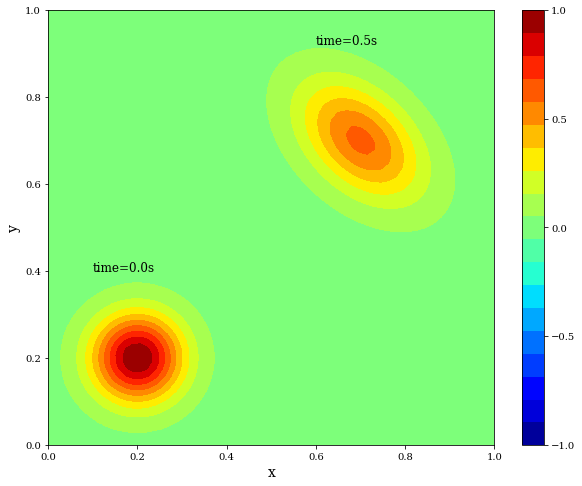

In [8]:
levs = np.linspace(-1,1,20)
plt.figure(figsize=(10,8))
plt.contourf(xx,yy,sol[-1][1:-1,1:-1]+sol[0][1:-1,1:-1],cmap=cm.jet,levels=levs,vmax=1.0,vmin=-1.0)
plt.text(0.1, 0.4, 'time=0.0s', fontsize=12)
plt.text(0.6, 0.92,'time={}s'.format(tend), fontsize=12)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
cbar = plt.colorbar()
plt.clim(-1,1)
cbar.set_ticks(np.linspace(-1,1,5))
# plt.savefig('./advection_2d.pdf',transparent=True)
plt.show()

## Numerical Solver
---

<IPython.core.display.Javascript object>


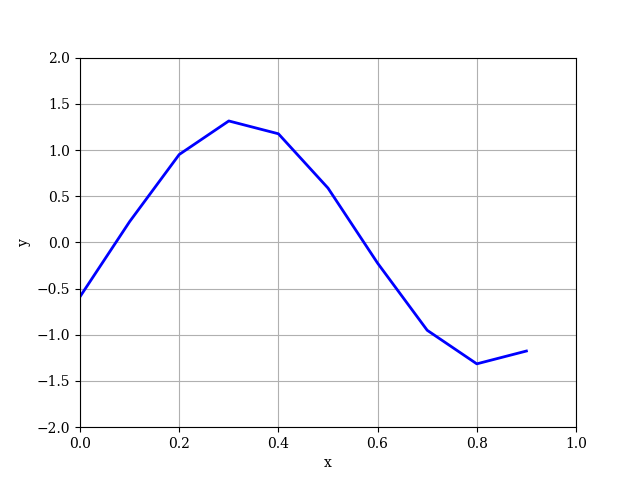

In [9]:
%matplotlib notebook
from numerical.layout import *
plty=PlotStyling()

In [10]:
# sol = plty.data['sol']
# x = plty.data['x']
# %matplotlib inline
# plt.figure(figsize=(5,4))
# plt.plot(x,sol[0][1:-1])
# plt.plot(x,sol[-1][1:-1])
# plt.text(-2, 0.8, 'time=0.0s', fontsize=12)
# plt.text(2.3, 0.6,'time={}s'.format(10.0), fontsize=12)
# plt.xlabel('x',fontsize=12)
# plt.ylabel('u',fontsize=12,rotation=0)
# plt.grid(alpha=0.25)
# plt.tight_layout()
# plt.savefig('./advection_1d_BTCS.pdf',transparent=True)